In [1]:
import cv2 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [6]:
tamil = pd.read_excel(r'tamil.xlsx')

In [7]:
img_list = tamil['படம்'].to_numpy()

In [8]:
img = cv2.imread(os.path.join(r'C:\Users\akash\FILES\Academics\sem-6\NLP\Project\Flickr_Data\Images',img_list[0].strip()))
img = cv2.resize(img,(256,256))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

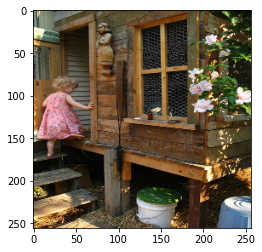

In [9]:
plt.imshow(img)

In [10]:
m=tf.keras.applications.xception.Xception(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(256,256,3), pooling='max'
)

In [11]:
m.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 127, 127, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 127, 127, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

 block4_sepconv1_bn (BatchNorma  (None, 32, 32, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 32, 32, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 32, 32, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 32, 32, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 16, 16, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 16, 16, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 16, 16, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 16, 16, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_19 (Add)                   (None, 16, 16, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_18[0][0]']                 
                                                                                                  
 block10_sepconv1_act (Activati  (None, 16, 16, 728)  0          ['add_19[0][0]']                 
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 16, 16, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 16, 16, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 16, 16, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 16, 16, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_22 (A

In [12]:
np.squeeze(m.predict(np.expand_dims(img,axis=0)),axis=0)

array([ 0.       , 12.094646 ,  2.6597044, ...,  0.       ,  9.134505 ,
        6.825409 ], dtype=float32)

In [ ]:
vector_list=[]
count=0
for img_name in img_list:
    try:
        img = cv2.imread(os.path.join(r'C:\Users\akash\FILES\Academics\sem-6\NLP\Project\Flickr_Data\Images',img_name.strip()))
        img = cv2.resize(img,(256,256))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        vec=np.squeeze(m.predict(np.expand_dims(img,axis=0)),axis=0)
        print(vec)
        vector_list.append(vec)
    except:
        vector_list.append(np.random.randn(2048))
        print(vector_list[-1])
    print(count,end='\r')
    count+=1

[ 0.        12.094646   2.6597044 ...  0.         9.134505   6.825409 ]
[ 0.        12.094646   2.6597044 ...  0.         9.134505   6.825409 ]
[ 0.        12.094646   2.6597044 ...  0.         9.134505   6.825409 ]
[ 0.        12.094646   2.6597044 ...  0.         9.134505   6.825409 ]
[ 0.        12.094646   2.6597044 ...  0.         9.134505   6.825409 ]
[ 0.        10.537984  17.925194  ...  0.         7.9379306  0.       ]
[ 0.        10.537984  17.925194  ...  0.         7.9379306  0.       ]
[ 0.        10.537984  17.925194  ...  0.         7.9379306  0.       ]
[ 0.        10.537984  17.925194  ...  0.         7.9379306  0.       ]
[ 0.        10.537984  17.925194  ...  0.         7.9379306  0.       ]
[  0.        56.111942 102.388115 ...   0.        58.812767   0.      ]
[  0.        56.111942 102.388115 ...   0.        58.812767   0.      ]
[  0.        56.111942 102.388115 ...   0.        58.812767   0.      ]
[  0.        56.111942 102.388115 ...   0.        58.812767   0.

[0.        0.        0.        ... 0.        1.6839135 0.       ]
[0.        0.        0.        ... 0.        1.6839135 0.       ]
[0.        0.        0.        ... 0.        1.6839135 0.       ]
[ 0.        9.106042 35.532585 ...  0.       26.18816   0.      ]
[ 0.        9.106042 35.532585 ...  0.       26.18816   0.      ]
[ 0.        9.106042 35.532585 ...  0.       26.18816   0.      ]
[ 0.        9.106042 35.532585 ...  0.       26.18816   0.      ]
[ 0.        9.106042 35.532585 ...  0.       26.18816   0.      ]
[ 0.       25.16146  19.767998 ...  0.        8.645536  0.      ]
[ 0.       25.16146  19.767998 ...  0.        8.645536  0.      ]
[ 0.       25.16146  19.767998 ...  0.        8.645536  0.      ]
[ 0.       25.16146  19.767998 ...  0.        8.645536  0.      ]
[ 0.       25.16146  19.767998 ...  0.        8.645536  0.      ]
[  0.        54.00764   78.100815 ...   0.       158.61282    0.      ]
[  0.        54.00764   78.100815 ...   0.       158.61282    0.      

[  0.         0.        26.12634  ...   0.       374.76633    5.130904]
[  0.         0.        26.12634  ...   0.       374.76633    5.130904]
[  0.         0.        26.12634  ...   0.       374.76633    5.130904]
[  0.         0.        26.12634  ...   0.       374.76633    5.130904]
[  0.         0.        26.12634  ...   0.       374.76633    5.130904]
[ 0.        11.377571  34.651638  ...  0.         7.6855917  0.       ]
[ 0.        11.377571  34.651638  ...  0.         7.6855917  0.       ]
[ 0.        11.377571  34.651638  ...  0.         7.6855917  0.       ]
[ 0.        11.377571  34.651638  ...  0.         7.6855917  0.       ]
[ 0.        11.377571  34.651638  ...  0.         7.6855917  0.       ]
[ 0.         0.        27.848177  ...  0.         0.9888696  0.       ]
[ 0.         0.        27.848177  ...  0.         0.9888696  0.       ]
[ 0.         0.        27.848177  ...  0.         0.9888696  0.       ]
[ 0.         0.        27.848177  ...  0.         0.9888696  0. 

[ 0.        0.       79.05786  ...  0.       38.416447  0.      ]
[ 0.        0.       79.05786  ...  0.       38.416447  0.      ]
[  0.       49.37877 102.62316 ...   0.      103.32054   0.     ]
[  0.       49.37877 102.62316 ...   0.      103.32054   0.     ]
[  0.       49.37877 102.62316 ...   0.      103.32054   0.     ]
[  0.       49.37877 102.62316 ...   0.      103.32054   0.     ]
[  0.       49.37877 102.62316 ...   0.      103.32054   0.     ]
[ 0.       80.56438  76.13857  ...  0.       63.865654  0.      ]
[ 0.       80.56438  76.13857  ...  0.       63.865654  0.      ]
[ 0.       80.56438  76.13857  ...  0.       63.865654  0.      ]
[ 0.       80.56438  76.13857  ...  0.       63.865654  0.      ]
[ 0.       80.56438  76.13857  ...  0.       63.865654  0.      ]
[ 0.       14.238736 31.68364  ...  0.       32.379208  0.      ]
[ 0.       14.238736 31.68364  ...  0.       32.379208  0.      ]
[ 0.       14.238736 31.68364  ...  0.       32.379208  0.      ]
[ 0.      

[ 0.        9.361044 15.733201 ...  0.       30.42649   0.      ]
[ 0.        9.361044 15.733201 ...  0.       30.42649   0.      ]
[ 0.       46.25783  46.435474 ...  0.       53.533897  0.      ]
[ 0.       46.25783  46.435474 ...  0.       53.533897  0.      ]
[ 0.       46.25783  46.435474 ...  0.       53.533897  0.      ]
[ 0.       46.25783  46.435474 ...  0.       53.533897  0.      ]
[ 0.       46.25783  46.435474 ...  0.       53.533897  0.      ]
[0.        0.        8.302201  ... 0.        2.4837096 0.       ]
[0.        0.        8.302201  ... 0.        2.4837096 0.       ]
[0.        0.        8.302201  ... 0.        2.4837096 0.       ]
[0.        0.        8.302201  ... 0.        2.4837096 0.       ]
[0.        0.        8.302201  ... 0.        2.4837096 0.       ]
[ 0.      43.58793 76.2616  ...  0.      65.79801  0.     ]
[ 0.      43.58793 76.2616  ...  0.      65.79801  0.     ]
[ 0.      43.58793 76.2616  ...  0.      65.79801  0.     ]
[ 0.      43.58793 76.2616  

[ 0.         3.0116546 60.86809   ...  0.        24.437515   0.       ]
[ 0.         3.0116546 60.86809   ...  0.        24.437515   0.       ]
[ 0.        0.       46.968826 ...  0.       31.943037  0.      ]
[ 0.        0.       46.968826 ...  0.       31.943037  0.      ]
[ 0.        0.       46.968826 ...  0.       31.943037  0.      ]
[ 0.        0.       46.968826 ...  0.       31.943037  0.      ]
[ 0.        0.       46.968826 ...  0.       31.943037  0.      ]
[0.        6.0749946 0.        ... 0.        0.1724487 0.       ]
[0.        6.0749946 0.        ... 0.        0.1724487 0.       ]
[0.        6.0749946 0.        ... 0.        0.1724487 0.       ]
[0.        6.0749946 0.        ... 0.        0.1724487 0.       ]
[0.        6.0749946 0.        ... 0.        0.1724487 0.       ]
[ 0.       30.778593 63.044434 ...  0.       35.121597  0.      ]
[ 0.       30.778593 63.044434 ...  0.       35.121597  0.      ]
[ 0.       30.778593 63.044434 ...  0.       35.121597  0.      

[ 0.       15.13355  36.341618 ...  0.       25.37591   0.      ]
[ 0.       15.13355  36.341618 ...  0.       25.37591   0.      ]
[ 0.       15.13355  36.341618 ...  0.       25.37591   0.      ]
[ 0.       15.13355  36.341618 ...  0.       25.37591   0.      ]
[  0.        45.311817 113.91059  ...   0.       148.14761    0.      ]
[  0.        45.311817 113.91059  ...   0.       148.14761    0.      ]
[  0.        45.311817 113.91059  ...   0.       148.14761    0.      ]
[  0.        45.311817 113.91059  ...   0.       148.14761    0.      ]
[  0.        45.311817 113.91059  ...   0.       148.14761    0.      ]
[ 0.       17.091671 70.79422  ...  0.       16.54171   0.      ]
[ 0.       17.091671 70.79422  ...  0.       16.54171   0.      ]
[ 0.       17.091671 70.79422  ...  0.       16.54171   0.      ]
[ 0.       17.091671 70.79422  ...  0.       16.54171   0.      ]
[ 0.       17.091671 70.79422  ...  0.       16.54171   0.      ]
[ 0.       22.326435 45.212627 ...  0.       1

[  0.          15.310008   155.112      ...   0.39328265  18.67209
   0.        ]
[  0.          15.310008   155.112      ...   0.39328265  18.67209
   0.        ]
[  0.          15.310008   155.112      ...   0.39328265  18.67209
   0.        ]
[  0.          15.310008   155.112      ...   0.39328265  18.67209
   0.        ]
[  0.          15.310008   155.112      ...   0.39328265  18.67209
   0.        ]
[0.         2.2470663  0.17878695 ... 0.         9.884135   0.23538354]
[0.         2.2470663  0.17878695 ... 0.         9.884135   0.23538354]
[0.         2.2470663  0.17878695 ... 0.         9.884135   0.23538354]
[0.         2.2470663  0.17878695 ... 0.         9.884135   0.23538354]
[0.         2.2470663  0.17878695 ... 0.         9.884135   0.23538354]
[  0.        43.226208  86.263    ...   0.       106.67424    0.      ]
[  0.        43.226208  86.263    ...   0.       106.67424    0.      ]
[  0.        43.226208  86.263    ...   0.       106.67424    0.      ]
[  0.        4

[ 0.       0.      34.96233 ...  0.       0.       0.     ]
[ 0.       0.      34.96233 ...  0.       0.       0.     ]
[ 0.       0.      34.96233 ...  0.       0.       0.     ]
[ 0.       0.      34.96233 ...  0.       0.       0.     ]
[ 0.       0.      34.96233 ...  0.       0.       0.     ]
[  0.        28.650486  95.890884 ...   0.       132.86299    0.      ]
[  0.        28.650486  95.890884 ...   0.       132.86299    0.      ]
[  0.        28.650486  95.890884 ...   0.       132.86299    0.      ]
[  0.        28.650486  95.890884 ...   0.       132.86299    0.      ]
[  0.        28.650486  95.890884 ...   0.       132.86299    0.      ]
[ 0.       42.580765 40.009106 ...  0.       42.47306   0.      ]
[ 0.       42.580765 40.009106 ...  0.       42.47306   0.      ]
[ 0.       42.580765 40.009106 ...  0.       42.47306   0.      ]
[ 0.       42.580765 40.009106 ...  0.       42.47306   0.      ]
[ 0.       42.580765 40.009106 ...  0.       42.47306   0.      ]
[ 0.      

[ 0.       29.87204  68.48099  ...  0.       12.161128  0.      ]
[ 0.       29.87204  68.48099  ...  0.       12.161128  0.      ]
[ 0.       29.87204  68.48099  ...  0.       12.161128  0.      ]
[ 0.       29.87204  68.48099  ...  0.       12.161128  0.      ]
[ 0.       29.87204  68.48099  ...  0.       12.161128  0.      ]
[ 0.       11.336358 65.20892  ...  0.       41.256996  0.      ]
[ 0.       11.336358 65.20892  ...  0.       41.256996  0.      ]
[ 0.       11.336358 65.20892  ...  0.       41.256996  0.      ]
[ 0.       11.336358 65.20892  ...  0.       41.256996  0.      ]
[ 0.       11.336358 65.20892  ...  0.       41.256996  0.      ]
[ 0.        0.       50.82353  ...  0.       12.732318  0.      ]
[ 0.        0.       50.82353  ...  0.       12.732318  0.      ]
[ 0.        0.       50.82353  ...  0.       12.732318  0.      ]
[ 0.        0.       50.82353  ...  0.       12.732318  0.      ]
[ 0.        0.       50.82353  ...  0.       12.732318  0.      ]
[  0.     

[ 0.       36.722107 17.149044 ...  0.       10.509486  0.      ]
[ 0.       36.722107 17.149044 ...  0.       10.509486  0.      ]
[ 0.       36.722107 17.149044 ...  0.       10.509486  0.      ]
[ 0.       16.841778 22.501839 ...  0.       10.021608  0.      ]
[ 0.       16.841778 22.501839 ...  0.       10.021608  0.      ]
[ 0.       16.841778 22.501839 ...  0.       10.021608  0.      ]
[ 0.       16.841778 22.501839 ...  0.       10.021608  0.      ]
[ 0.       16.841778 22.501839 ...  0.       10.021608  0.      ]
[ 0.         0.4197515 21.472174  ...  0.        10.941132   0.       ]
[ 0.         0.4197515 21.472174  ...  0.        10.941132   0.       ]
[ 0.         0.4197515 21.472174  ...  0.        10.941132   0.       ]
[ 0.         0.4197515 21.472174  ...  0.        10.941132   0.       ]
[ 0.         0.4197515 21.472174  ...  0.        10.941132   0.       ]
[ 0.        5.606525 15.644441 ...  0.       17.50945   0.      ]
[ 0.        5.606525 15.644441 ...  0.       1

[  0.       101.1181    58.214672 ...   0.       117.22268    0.      ]
[  0.       101.1181    58.214672 ...   0.       117.22268    0.      ]
[ 0.       17.174273 39.422752 ...  0.       26.326168  0.      ]
[ 0.       17.174273 39.422752 ...  0.       26.326168  0.      ]
[ 0.       17.174273 39.422752 ...  0.       26.326168  0.      ]
[ 0.       17.174273 39.422752 ...  0.       26.326168  0.      ]
[ 0.       17.174273 39.422752 ...  0.       26.326168  0.      ]
[ 0.       24.791517 32.19391  ...  0.       24.025995  0.      ]
[ 0.       24.791517 32.19391  ...  0.       24.025995  0.      ]
[ 0.       24.791517 32.19391  ...  0.       24.025995  0.      ]
[ 0.       24.791517 32.19391  ...  0.       24.025995  0.      ]
[ 0.       24.791517 32.19391  ...  0.       24.025995  0.      ]
[ 0.       24.289253 52.93829  ...  0.       45.0223    0.      ]
[ 0.       24.289253 52.93829  ...  0.       45.0223    0.      ]
[ 0.       24.289253 52.93829  ...  0.       45.0223    0.      

[ 0.        33.234016  28.928589  ...  0.         7.4632535  0.       ]
[ 0.        33.234016  28.928589  ...  0.         7.4632535  0.       ]
[ 0.        33.234016  28.928589  ...  0.         7.4632535  0.       ]
[ 0.        33.234016  28.928589  ...  0.         7.4632535  0.       ]
[ 0.        33.234016  28.928589  ...  0.         7.4632535  0.       ]
[ 0.       55.50241  35.038334 ...  0.       40.44236   0.      ]
[ 0.       55.50241  35.038334 ...  0.       40.44236   0.      ]
[ 0.       55.50241  35.038334 ...  0.       40.44236   0.      ]
[ 0.       55.50241  35.038334 ...  0.       40.44236   0.      ]
[ 0.       55.50241  35.038334 ...  0.       40.44236   0.      ]
[ 0.        14.029551   5.6996584 ...  0.         6.4072475  7.199134 ]
[ 0.        14.029551   5.6996584 ...  0.         6.4072475  7.199134 ]
[ 0.        14.029551   5.6996584 ...  0.         6.4072475  7.199134 ]
[ 0.        14.029551   5.6996584 ...  0.         6.4072475  7.199134 ]
[ 0.        14.029551 

[ 0.       28.63537   0.       ...  0.       14.042821  0.      ]
[ 0.       28.63537   0.       ...  0.       14.042821  0.      ]
[ 0.       28.63537   0.       ...  0.       14.042821  0.      ]
[ 0.       35.041904 41.867584 ...  0.       48.728603  0.      ]
[ 0.       35.041904 41.867584 ...  0.       48.728603  0.      ]
[ 0.       35.041904 41.867584 ...  0.       48.728603  0.      ]
[ 0.       35.041904 41.867584 ...  0.       48.728603  0.      ]
[ 0.       35.041904 41.867584 ...  0.       48.728603  0.      ]
[ 0.       10.983193 48.693592 ...  0.       39.096058  0.      ]
[ 0.       10.983193 48.693592 ...  0.       39.096058  0.      ]
[ 0.       10.983193 48.693592 ...  0.       39.096058  0.      ]
[ 0.       10.983193 48.693592 ...  0.       39.096058  0.      ]
[ 0.       10.983193 48.693592 ...  0.       39.096058  0.      ]
[  0.        58.679752 126.91374  ...   0.        93.518425   0.      ]
[  0.        58.679752 126.91374  ...   0.        93.518425   0.      

[ 0.        0.       74.648    ...  0.       22.624508  0.      ]
[ 0.        0.       10.767961 ...  0.        0.        0.      ]
[ 0.        0.       10.767961 ...  0.        0.        0.      ]
[ 0.        0.       10.767961 ...  0.        0.        0.      ]
[ 0.        0.       10.767961 ...  0.        0.        0.      ]
[ 0.        0.       10.767961 ...  0.        0.        0.      ]
[ 0.         9.499492   2.0809267 ...  0.        13.013056   0.       ]
[ 0.         9.499492   2.0809267 ...  0.        13.013056   0.       ]
[ 0.         9.499492   2.0809267 ...  0.        13.013056   0.       ]
[ 0.         9.499492   2.0809267 ...  0.        13.013056   0.       ]
[ 0.         9.499492   2.0809267 ...  0.        13.013056   0.       ]
[ 0.       15.538919 26.92873  ...  0.       15.66062   0.      ]
[ 0.       15.538919 26.92873  ...  0.       15.66062   0.      ]
[ 0.       15.538919 26.92873  ...  0.       15.66062   0.      ]
[ 0.       15.538919 26.92873  ...  0.       1

[ 0.       23.210274 71.131935 ...  0.       66.23178   0.      ]
[ 0.       23.210274 71.131935 ...  0.       66.23178   0.      ]
[ 0.       23.210274 71.131935 ...  0.       66.23178   0.      ]
[  0.         4.638616 154.48349  ...   0.        83.71103    0.      ]
[  0.         4.638616 154.48349  ...   0.        83.71103    0.      ]
[  0.         4.638616 154.48349  ...   0.        83.71103    0.      ]
[  0.         4.638616 154.48349  ...   0.        83.71103    0.      ]
[  0.         4.638616 154.48349  ...   0.        83.71103    0.      ]
[ 0.        0.       48.460236 ...  0.        0.        0.      ]
[ 0.        0.       48.460236 ...  0.        0.        0.      ]
[ 0.        0.       48.460236 ...  0.        0.        0.      ]
[ 0.        0.       48.460236 ...  0.        0.        0.      ]
[ 0.        0.       48.460236 ...  0.        0.        0.      ]
[ 0.        1.186064 30.15658  ...  0.       20.530607  0.      ]
[ 0.        1.186064 30.15658  ...  0.       2

[ 0.       22.178078 11.530726 ...  0.       21.727432  0.      ]
[ 0.       22.178078 11.530726 ...  0.       21.727432  0.      ]
[ 0.         1.9470186 30.145723  ...  0.        73.93069    0.       ]
[ 0.         1.9470186 30.145723  ...  0.        73.93069    0.       ]
[ 0.         1.9470186 30.145723  ...  0.        73.93069    0.       ]
[ 0.         1.9470186 30.145723  ...  0.        73.93069    0.       ]
[ 0.         1.9470186 30.145723  ...  0.        73.93069    0.       ]
[ 0.          0.60644674 33.261787   ...  0.         17.904804
  0.        ]


In [18]:
vector_list[:5]

[array([ 0.       , 12.094646 ,  2.6597044, ...,  0.       ,  9.134505 ,
         6.825409 ], dtype=float32),
 array([ 0.       , 12.094646 ,  2.6597044, ...,  0.       ,  9.134505 ,
         6.825409 ], dtype=float32),
 array([ 0.       , 12.094646 ,  2.6597044, ...,  0.       ,  9.134505 ,
         6.825409 ], dtype=float32),
 array([ 0.       , 12.094646 ,  2.6597044, ...,  0.       ,  9.134505 ,
         6.825409 ], dtype=float32),
 array([ 0.       , 12.094646 ,  2.6597044, ...,  0.       ,  9.134505 ,
         6.825409 ], dtype=float32)]

In [15]:
dic ={
    'image_name':img_list,
    'vector':vector_list
}

In [16]:
df = pd.DataFrame.from_dict(dic)

In [17]:
df.to_csv('image_vectors.csv')
df.to_json("image_vectors.json")

In [36]:
csv_save = pd.read_json("image_vectors.json")
len(csv_save['vector'][0])

2048